In [5]:
!pip install beautifulsoup4 requests pandas


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import re

# List of Indian stock symbols (NSE symbols)
indian_stocks = ['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK']  # Add more as needed

# Date range (last 7 days)
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=7)

# Example financial news websites (to be customized)
news_websites = [
    "https://www.moneycontrol.com/news/business/markets",
    "https://economictimes.indiatimes.com/markets/stocks",
    # Add more news website URLs
]

def fetch_articles(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        # Assuming articles are within 'a' tags with 'href' attribute
        articles = soup.find_all('a', href=True)
        return articles
    except Exception as e:
        print(f"Error fetching articles from {url}: {e}")
        return []

def extract_mentions(text, stocks):
    mentions = {stock: 0 for stock in stocks}
    for stock in stocks:
        mentions[stock] += len(re.findall(stock, text, re.IGNORECASE))
    return mentions

def scrape_news():
    all_mentions = {stock: 0 for stock in indian_stocks}

    for website in news_websites:
        articles = fetch_articles(website)

        for article in articles:
            article_url = article['href']
            if not article_url.startswith("http"):
                if article_url.startswith("javascript"):
                    continue
                base_url = website.split('//')[1].split('/')[0]
                article_url = f"https://{base_url}{article_url}"

            try:
                article_response = requests.get(article_url)
                article_response.raise_for_status()
                article_soup = BeautifulSoup(article_response.content, 'html.parser')
                article_text = article_soup.get_text()

                mentions = extract_mentions(article_text, indian_stocks)

                for stock, count in mentions.items():
                    all_mentions[stock] += count
            except Exception as e:
                print(f"Failed to fetch or parse article {article_url}: {e}")

    return all_mentions

def main():
    stock_mentions = scrape_news()
    stock_mentions_df = pd.DataFrame(list(stock_mentions.items()), columns=['Stock', 'Mentions'])
    stock_mentions_df.sort_values(by='Mentions', ascending=False, inplace=True)
    print(stock_mentions_df)

    # Save to CSV
    stock_mentions_df.to_csv('indian_stock_mentions.csv', index=False)

if __name__ == "__main__":
    main()


Failed to fetch or parse article https://mmb.moneycontrol.com/poll/historical-polls/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/historical-polls/
Failed to fetch or parse article https://mmb.moneycontrol.com/poll/market-sentiments/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/market-sentiments/


Failed to fetch or parse article https://overdrive.in/: HTTPSConnectionPool(host='overdrive.in', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1007)')))


Failed to fetch or parse article https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex
Failed to fetch or parse article https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r
       Stock  Mentions
1        TCS      1711
0   RELIANCE       860
2       INFY       265
3   HDFCBANK        14
4  ICICIBANK         9


Failed to fetch or parse article https://mmb.moneycontrol.com/poll/historical-polls/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/historical-polls/
Failed to fetch or parse article https://mmb.moneycontrol.com/poll/market-sentiments/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/market-sentiments/


Failed to fetch or parse article https://overdrive.in/: HTTPSConnectionPool(host='overdrive.in', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1007)')))


Failed to fetch or parse article https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex
Failed to fetch or parse article https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r
Error fetching articles from https://www.business-standard.com/category/markets-news-1010101.htm: 403 Client Error: Forbidden for url: https://www.business-standard.com/category/markets-news-1010101.htm
Error fetching articles from https://www.financialexpress.com/market/: 403 Client Error: Forbidden for url: https://www.financialexpress.com/market/
Failed to fetch or parse article https://www.ndtv.com/search?q=: 404 Client Error: Not Found for url: https://www.ndtv.com/search?q=
Failed to fetch or parse article https://www.ndtv.com/personal-finance?src=me

/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Failed to fetch or parse article https://www.ndtv.com/stories.rss: 404 Client Error: Not Found for url: https://www.ndtv.com/stories.rss
Failed to fetch or parse article https://www.ndtv.com/about-us: 404 Client Error: Not Found for url: https://www.ndtv.com/about-us
Failed to fetch or parse article https://www.ndtv.com/terms-of-use: 404 Client Error: Not Found for url: https://www.ndtv.com/terms-of-use
Failed to fetch or parse article https://www.ndtv.com/privacy-policy: 404 Client Error: Not Found for url: https://www.ndtv.com/privacy-policy
Failed to fetch or parse article https://www.ndtv.com/stories.rss: 404 Client Error: Not Found for url: https://www.ndtv.com/stories.rss
Failed to fetch or parse article https://www.cnbctv18.com/binge/fast-lane/: 404 Client Error: Not Found for url: https://www.cnbctv18.com/binge/fast-lane/
Failed to fetch or parse article https://www.cnbctv18.com/binge/tech-at-work/: 404 Client Error: Not Found for url: https://www.cnbctv18.com/binge/tech-at-wor

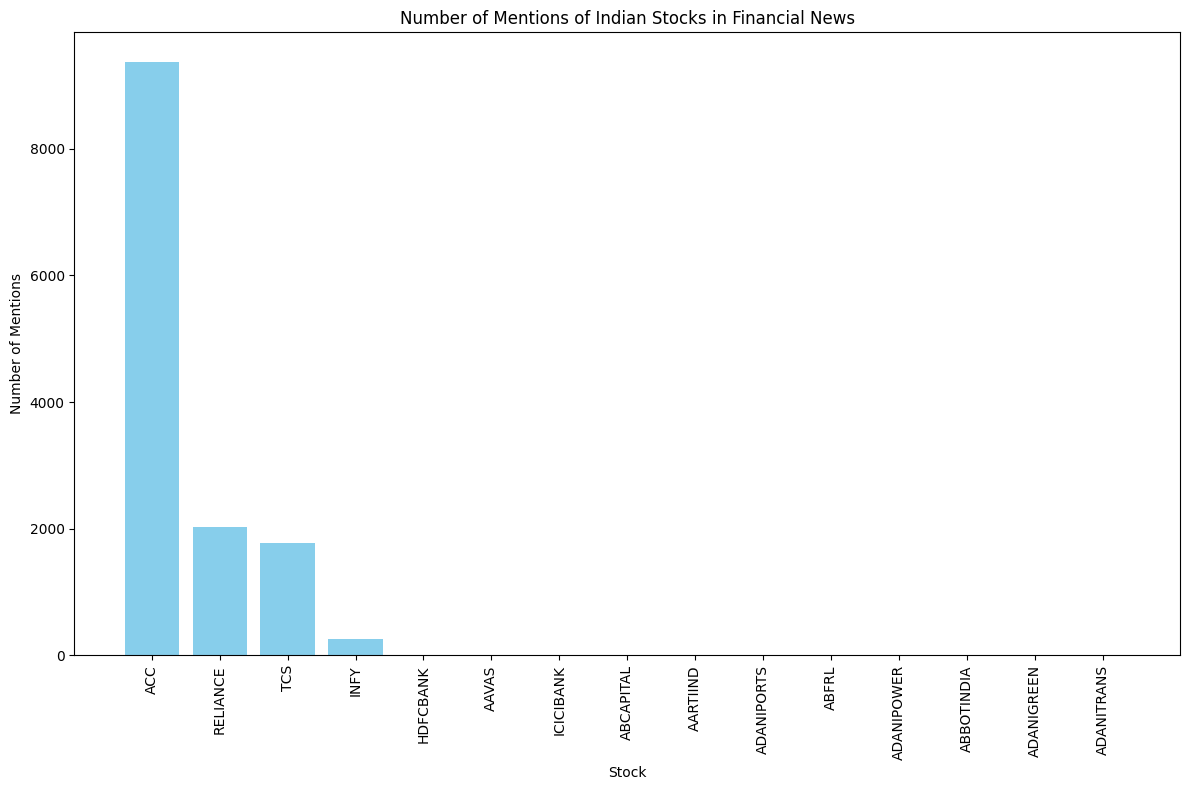

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt

# Full list of Indian stock symbols (NSE symbols) for Nifty 50, Mid Cap 100, and Small Cap 250
indian_stocks = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK',  # Add more Nifty 50
    'ABCAPITAL', 'ABFRL', 'ACC', 'ADANIPORTS', 'ADANIPOWER',  # Add more Mid Cap 100
    'AARTIIND', 'AAVAS', 'ABBOTINDIA', 'ADANIGREEN', 'ADANITRANS'  # Add more Small Cap 250
    # Extend this list with all the tickers
]

# Date range (last 7 days)
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=7)

# List of financial news websites
news_websites = [
    "https://www.moneycontrol.com/news/business/markets",
    "https://economictimes.indiatimes.com/markets/stocks",
    "https://www.business-standard.com/category/markets-news-1010101.htm",
    "https://www.financialexpress.com/market/",
    "https://www.ndtv.com/business/latest",
    "https://www.cnbctv18.com/market/",
    "https://www.thehindubusinessline.com/markets/",
    # Add more news website URLs as needed
]

def fetch_articles(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        # Assuming articles are within 'a' tags with 'href' attribute
        articles = soup.find_all('a', href=True)
        return articles
    except Exception as e:
        print(f"Error fetching articles from {url}: {e}")
        return []

def extract_mentions(text, stocks):
    mentions = {stock: 0 for stock in stocks}
    for stock in stocks:
        mentions[stock] += len(re.findall(stock, text, re.IGNORECASE))
    return mentions

def scrape_news():
    all_mentions = {stock: 0 for stock in indian_stocks}

    for website in news_websites:
        articles = fetch_articles(website)

        for article in articles:
            article_url = article['href']
            if not article_url.startswith("http"):
                if article_url.startswith("javascript"):
                    continue
                base_url = website.split('//')[1].split('/')[0]
                article_url = f"https://{base_url}{article_url}"

            try:
                article_response = requests.get(article_url)
                article_response.raise_for_status()
                article_soup = BeautifulSoup(article_response.content, 'html.parser')
                article_text = article_soup.get_text()

                mentions = extract_mentions(article_text, indian_stocks)

                for stock, count in mentions.items():
                    all_mentions[stock] += count
            except Exception as e:
                print(f"Failed to fetch or parse article {article_url}: {e}")

    return all_mentions

def visualize_data(stock_mentions_df):
    plt.figure(figsize=(12, 8))
    plt.bar(stock_mentions_df['Stock'], stock_mentions_df['Mentions'], color='skyblue')
    plt.xlabel('Stock')
    plt.ylabel('Number of Mentions')
    plt.title('Number of Mentions of Indian Stocks in Financial News')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def main():
    stock_mentions = scrape_news()
    stock_mentions_df = pd.DataFrame(list(stock_mentions.items()), columns=['Stock', 'Mentions'])
    stock_mentions_df.sort_values(by='Mentions', ascending=False, inplace=True)
    print(stock_mentions_df)

    # Save to CSV
    stock_mentions_df.to_csv('indian_stock_mentions.csv', index=False)

    # Visualize data
    visualize_data(stock_mentions_df)

if __name__ == "__main__":
    main()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 598.1 kB/s eta 0:00:00
Failed to fetch or parse article https://www.moneycontrol.com/india/bestportfoliomanager/investment-tool: Exceeded 30 redirects.
Failed to fetch or parse article https://www.moneycontrol.com/mcplus/portfolio/logout.php?ref=https://www.moneycontrol.com/mcplus/portfolio/loginportfolio.php: Exceeded 30 redirects.


Failed to fetch or parse article https://www.moneycontrol.com/india/bestportfoliomanager/investment-tool: Exceeded 30 redirects.


Failed to fetch or parse article https://mmb.moneycontrol.com/poll/historical-polls/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/historical-polls/
Failed to fetch or parse article https://mmb.moneycontrol.com/poll/market-sentiments/: 404 Client Error: Not Found for url: https://mmb.moneycontrol.com/poll/market-sentiments/


Failed to fetch or parse article https://www.moneycontrol.com/india/bestportfoliomanager/investment-tool: Exceeded 30 redirects.


Failed to fetch or parse article https://www.moneycontrol.com/india/bestportfoliomanager/investment-tool: Exceeded 30 redirects.


Failed to fetch or parse article https://overdrive.in/: HTTPSConnectionPool(host='overdrive.in', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1007)')))


Failed to fetch or parse article https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com//economictimes.indiatimes.com/markets/forex
Failed to fetch or parse article https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r: 404 Client Error: Not Found for url: https://economictimes.indiatimes.com/markets/stocks/stock-quotes/r
Error fetching articles from https://www.business-standard.com/category/markets-news-1010101.htm: 403 Client Error: Forbidden for url: https://www.business-standard.com/category/markets-news-1010101.htm
Failed to fetch or parse article https://www.livemint.comJavaScript:Void(0);: Failed to parse: https://www.livemint.comJavaScript:Void(0);
Failed to fetch or parse article https://www.livemint.comJavaScript:Void(0);: Failed to parse: https://www.livemint.comJavaScript:Void(0);
Failed to fetch or parse article https://www.livemint.comJavaScript:Void(0);: Fai

/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Failed to fetch or parse article https://www.ndtv.com/stories.rss: 404 Client Error: Not Found for url: https://www.ndtv.com/stories.rss
Failed to fetch or parse article https://www.ndtv.com/about-us: 404 Client Error: Not Found for url: https://www.ndtv.com/about-us
Failed to fetch or parse article https://www.ndtv.com/terms-of-use: 404 Client Error: Not Found for url: https://www.ndtv.com/terms-of-use
Failed to fetch or parse article https://www.ndtv.com/privacy-policy: 404 Client Error: Not Found for url: https://www.ndtv.com/privacy-policy
Failed to fetch or parse article https://www.ndtv.com/stories.rss: 404 Client Error: Not Found for url: https://www.ndtv.com/stories.rss
Failed to fetch or parse article https://www.cnbctv18.com/binge/fast-lane/: 404 Client Error: Not Found for url: https://www.cnbctv18.com/binge/fast-lane/
Failed to fetch or parse article https://www.cnbctv18.com/binge/tech-at-work/: 404 Client Error: Not Found for url: https://www.cnbctv18.com/binge/tech-at-wor

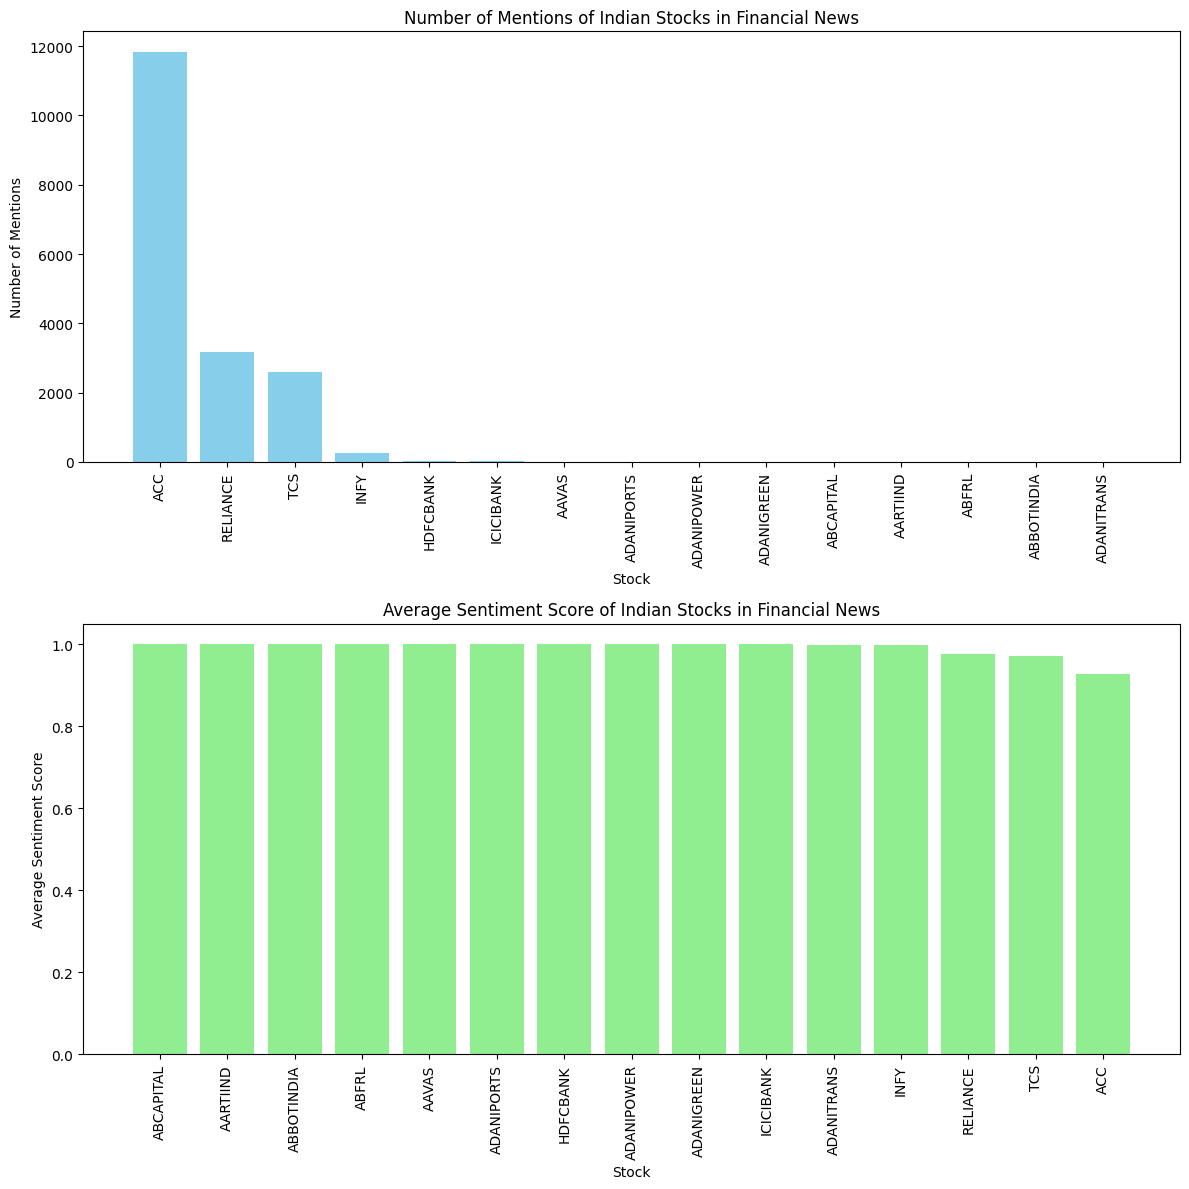

In [14]:
!pip install vaderSentiment
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Full list of Indian stock symbols (NSE symbols) for Nifty 50, Mid Cap 100, and Small Cap 250
indian_stocks = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK',  # Add more Nifty 50
    'ABCAPITAL', 'ABFRL', 'ACC', 'ADANIPORTS', 'ADANIPOWER',  # Add more Mid Cap 100
    'AARTIIND', 'AAVAS', 'ABBOTINDIA', 'ADANIGREEN', 'ADANITRANS'  # Add more Small Cap 250
    # Extend this list with all the tickers
]

# Date range (last 7 days)
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=7)

# List of financial news websites
news_websites = [
    "https://www.moneycontrol.com/news/business/markets",
    "https://economictimes.indiatimes.com/markets/stocks",
    "https://www.business-standard.com/category/markets-news-1010101.htm",
    "https://www.livemint.com/market/stock-market-news",
    "https://www.financialexpress.com/market/",
    "https://www.ndtv.com/business/latest",
    "https://www.cnbctv18.com/market/",
    "https://www.thehindubusinessline.com/markets/",
    # Add more news website URLs as needed
]

def fetch_articles(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        # Assuming articles are within 'a' tags with 'href' attribute
        articles = soup.find_all('a', href=True)
        return articles
    except Exception as e:
        print(f"Error fetching articles from {url}: {e}")
        return []

def extract_mentions(text, stocks):
    mentions = {stock: 0 for stock in stocks}
    sentiments = {stock: [] for stock in stocks}
    analyzer = SentimentIntensityAnalyzer()

    for stock in stocks:
        if re.search(stock, text, re.IGNORECASE):
            mentions[stock] += len(re.findall(stock, text, re.IGNORECASE))
            sentiment = analyzer.polarity_scores(text)
            sentiments[stock].append(sentiment['compound'])

    return mentions, sentiments

def scrape_news():
    all_mentions = {stock: 0 for stock in indian_stocks}
    all_sentiments = {stock: [] for stock in indian_stocks}

    for website in news_websites:
        articles = fetch_articles(website)

        for article in articles:
            article_url = article['href']
            if not article_url.startswith("http"):
                if article_url.startswith("javascript"):
                    continue
                base_url = website.split('//')[1].split('/')[0]
                article_url = f"https://{base_url}{article_url}"

            try:
                article_response = requests.get(article_url)
                article_response.raise_for_status()
                article_soup = BeautifulSoup(article_response.content, 'html.parser')
                article_text = article_soup.get_text()

                mentions, sentiments = extract_mentions(article_text, indian_stocks)

                for stock in indian_stocks:
                    all_mentions[stock] += mentions[stock]
                    all_sentiments[stock].extend(sentiments[stock])
            except Exception as e:
                print(f"Failed to fetch or parse article {article_url}: {e}")

    return all_mentions, all_sentiments

def visualize_data(stock_mentions_df, stock_sentiments_df):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # Bar plot for number of mentions
    axes[0].bar(stock_mentions_df['Stock'], stock_mentions_df['Mentions'], color='skyblue')
    axes[0].set_xlabel('Stock')
    axes[0].set_ylabel('Number of Mentions')
    axes[0].set_title('Number of Mentions of Indian Stocks in Financial News')
    axes[0].tick_params(axis='x', rotation=90)

    # Bar plot for average sentiment scores
    axes[1].bar(stock_sentiments_df['Stock'], stock_sentiments_df['Average Sentiment'], color='lightgreen')
    axes[1].set_xlabel('Stock')
    axes[1].set_ylabel('Average Sentiment Score')
    axes[1].set_title('Average Sentiment Score of Indian Stocks in Financial News')
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

def main():
    stock_mentions, stock_sentiments = scrape_news()

    # Prepare data for mentions
    stock_mentions_df = pd.DataFrame(list(stock_mentions.items()), columns=['Stock', 'Mentions'])
    stock_mentions_df.sort_values(by='Mentions', ascending=False, inplace=True)

    # Prepare data for sentiments
    average_sentiments = {stock: sum(scores)/len(scores) if scores else 0 for stock, scores in stock_sentiments.items()}
    stock_sentiments_df = pd.DataFrame(list(average_sentiments.items()), columns=['Stock', 'Average Sentiment'])
    stock_sentiments_df.sort_values(by='Average Sentiment', ascending=False, inplace=True)

    print(stock_mentions_df)
    print(stock_sentiments_df)

    # Save to CSV
    stock_mentions_df.to_csv('indian_stock_mentions.csv', index=False)
    stock_sentiments_df.to_csv('indian_stock_sentiments.csv', index=False)

    # Visualize data
    visualize_data(stock_mentions_df, stock_sentiments_df)

if __name__ == "__main__":
    main()
